<a href="https://colab.research.google.com/github/KaziTanzil/CVPR/blob/Mid/Cvpr_Assignment1(22_47783_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CVPR_dataset_Animals.zip to CVPR_dataset_Animals.zip


In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
import zipfile
import os

zip_file_name = 'CVPR_dataset_Animals.zip'


data_set = '/content/CVPR_dataset_Animals'
os.makedirs(data_set, exist_ok=True)

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(data_set)

print(f"Files extracted to {data_set}")

categories = os.listdir(data_set)
print(categories)

Files extracted to /content/CVPR_dataset_Animals
['Leopard', 'Lion', 'Cheetah', 'Tiger', 'Jaguar']


In [10]:
train_data = []


for c in categories:
    path = os.path.join(data_set, c)
    class_index = categories.index(c)
    print(f"Processing category: {c} (Index: {class_index})")


    for img in tqdm(os.listdir(path), desc=f"Processing images in {c}", leave=True):
        try:

            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            if img_array is None:
                raise ValueError(f"Image {img} could not be read or is corrupted.")

            img_array = cv2.resize(img_array, (256, 256))
            train_data.append([img_array, class_index])

        except Exception as e:
            print(f"Skipping corrupted image {img} in {c}: {e}")

print(f"\nTotal images processed: {len(train_data)}")


Processing category: Leopard (Index: 0)


Processing images in Leopard: 100%|██████████| 31/31 [00:00<00:00, 357.79it/s]


Processing category: Lion (Index: 1)


Processing images in Lion: 100%|██████████| 32/32 [00:00<00:00, 288.74it/s]


Processing category: Cheetah (Index: 2)


Processing images in Cheetah: 100%|██████████| 38/38 [00:00<00:00, 290.98it/s]


Processing category: Tiger (Index: 3)


Processing images in Tiger: 100%|██████████| 39/39 [00:00<00:00, 277.53it/s]


Processing category: Jaguar (Index: 4)


Processing images in Jaguar: 100%|██████████| 30/30 [00:00<00:00, 310.28it/s]


Total images processed: 170


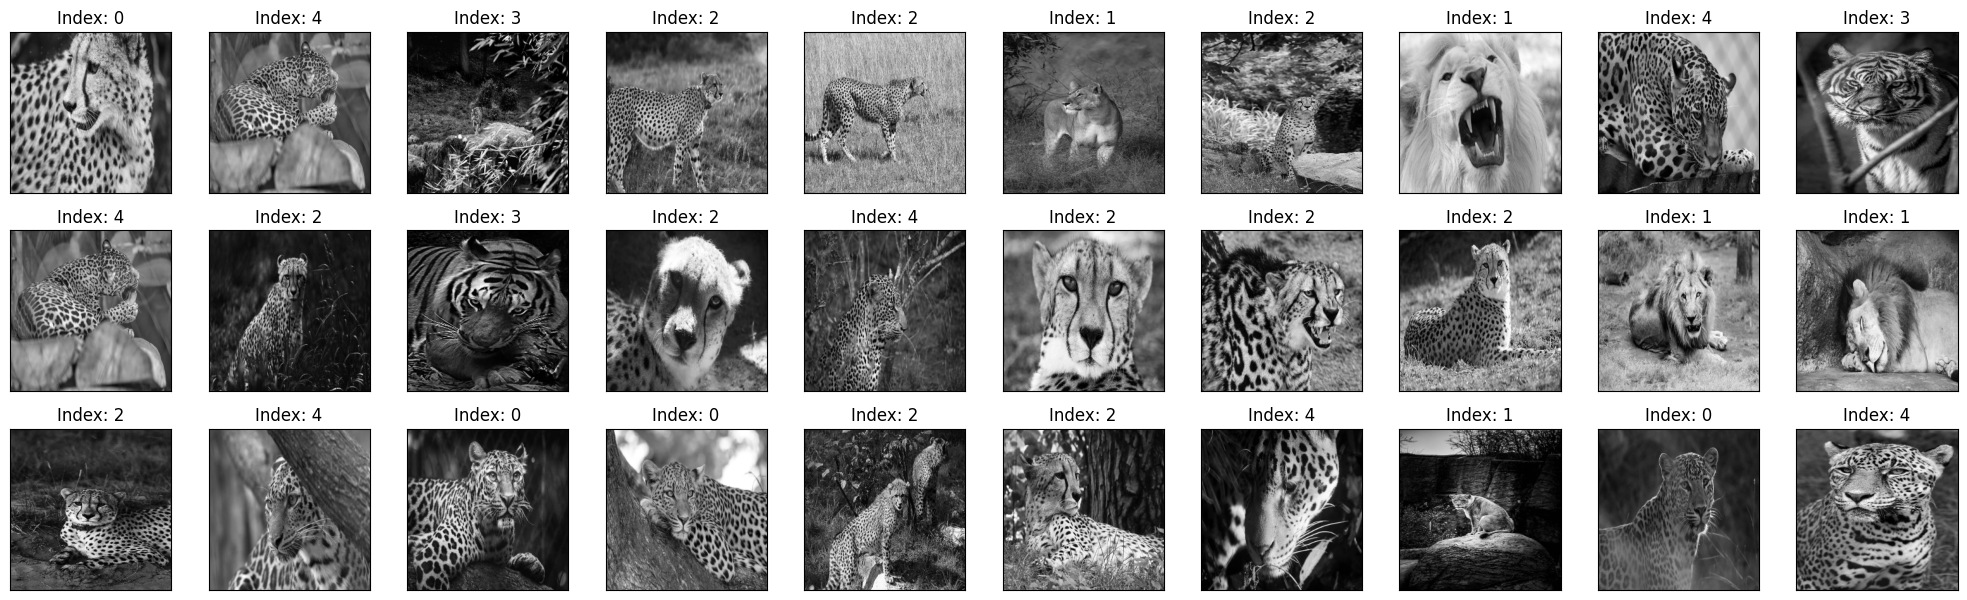

In [11]:
import matplotlib.pyplot as plt
random.shuffle(train_data)
plt.figure(figsize=(20, 20))
i = 20

for n in range(10):
    for e in range(10):

        img_index = i + n * 50 + e
        if img_index < len(train_data):
            plt.subplot(10, 10, n * 10 + e + 1)
            plt.imshow(train_data[img_index][0], cmap="gray")
            plt.xticks([])
            plt.yticks([])
            plt.title(f"Index: {train_data[img_index][1]}")

plt.tight_layout()
plt.show()


In [29]:
import numpy as np
import random

random.shuffle(train_data)


num_folds = 5
fold_size = len(train_data) // num_folds

folds = [train_data[i * fold_size: (i + 1) * fold_size] for i in range(num_folds)]

def euclidean_distance(img1, img2):
    try:
        return np.sqrt(np.sum((img1.flatten() - img2.flatten())**2))
    except Exception as e:
        print(f"Error calculating distance: {e}")
        return float('inf')

accuracies = {k: [] for k in range(1, 6)}

for fold_num in range(num_folds):
    validation_fold = folds[fold_num]
    training_folds = [folds[i] for i in range(num_folds) if i != fold_num]
    training_data = [item for sublist in training_folds for item in sublist]

    print(f"Iteration {fold_num + 1}")

    for k in range(1, 6):
        correct_predictions = 0
        total_predictions = len(validation_fold)

        for val_img, val_label in validation_fold:
            distances = []
            for train_img, train_label in training_data:
                try:
                    distance = euclidean_distance(val_img, train_img)
                    distances.append((distance, train_label))
                except Exception as e:
                    print(f"Skipped a corrupted training image: {e}")

            if distances:
                distances.sort(key=lambda x: x[0])
                nearest_neighbors = [label for _, label in distances[:k]]

                predicted_label = max(set(nearest_neighbors), key=nearest_neighbors.count)

                if predicted_label == val_label:
                    correct_predictions += 1

        accuracy = correct_predictions / total_predictions  *100
        accuracies[k].append(accuracy)

        print(f"When k={k} ----> Accuracy = {accuracy:.3f}%")

    print("-" * 40)

median_points = []
for i in range(num_folds):
    fold_accuracies = [accuracies[k][i] for k in range(1, 6)]
    median_accuracy = np.median(fold_accuracies)
    median_points.append(median_accuracy)


Iteration 1
When k=1 ----> Accuracy = 32.353%
When k=2 ----> Accuracy = 44.118%
When k=3 ----> Accuracy = 32.353%
When k=4 ----> Accuracy = 32.353%
When k=5 ----> Accuracy = 29.412%
----------------------------------------
Iteration 2
When k=1 ----> Accuracy = 20.588%
When k=2 ----> Accuracy = 11.765%
When k=3 ----> Accuracy = 29.412%
When k=4 ----> Accuracy = 23.529%
When k=5 ----> Accuracy = 14.706%
----------------------------------------
Iteration 3
When k=1 ----> Accuracy = 38.235%
When k=2 ----> Accuracy = 23.529%
When k=3 ----> Accuracy = 26.471%
When k=4 ----> Accuracy = 20.588%
When k=5 ----> Accuracy = 17.647%
----------------------------------------
Iteration 4
When k=1 ----> Accuracy = 29.412%
When k=2 ----> Accuracy = 26.471%
When k=3 ----> Accuracy = 38.235%
When k=4 ----> Accuracy = 35.294%
When k=5 ----> Accuracy = 23.529%
----------------------------------------
Iteration 5
When k=1 ----> Accuracy = 29.412%
When k=2 ----> Accuracy = 11.765%
When k=3 ----> Accuracy = 26

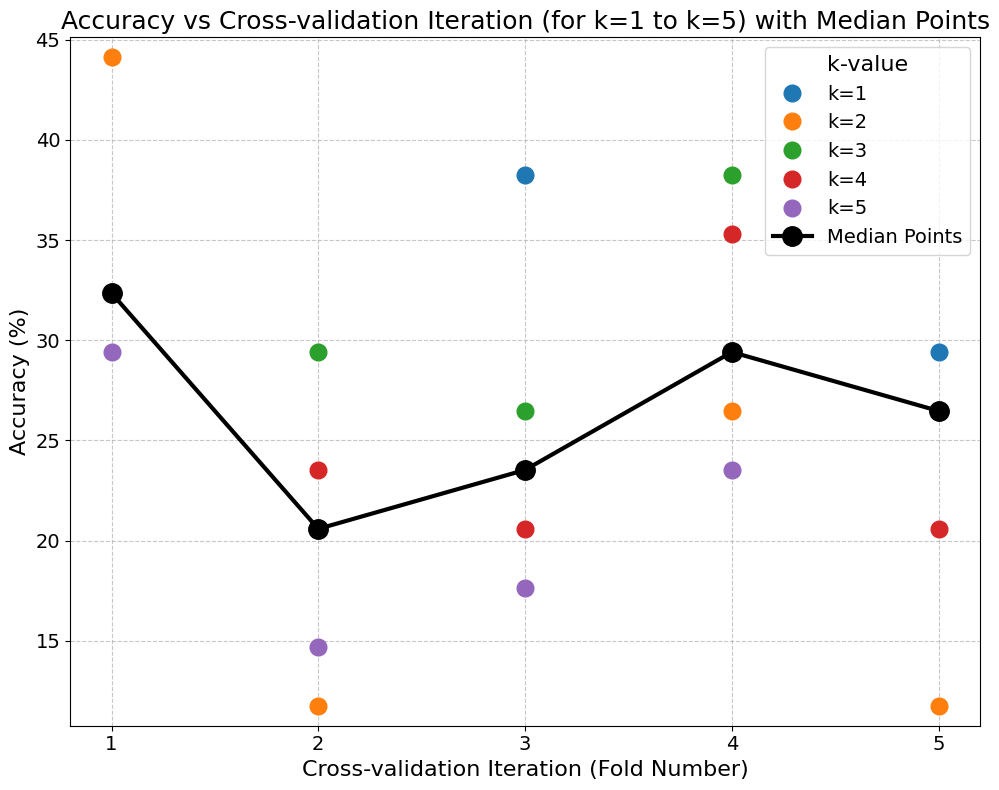

In [30]:

num_folds = 5

plt.figure(figsize=(10, 8))
for k in range(1, 6):
    plt.plot(range(1, num_folds + 1), accuracies[k], marker='o', markersize=12, linestyle='', label=f'k={k}')


plt.plot(range(1, num_folds + 1), median_points, color='black', marker='o', markersize=14, linestyle='-', linewidth=3, label="Median Points")


min_accuracy = min(min(accuracies[k]) for k in accuracies) - 1
max_accuracy = max(max(accuracies[k]) for k in accuracies) + 1
plt.ylim(min_accuracy, max_accuracy)


plt.title('Accuracy vs Cross-validation Iteration (for k=1 to k=5) with Median Points', fontsize=18)
plt.xlabel('Cross-validation Iteration (Fold Number)', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.xticks(range(1, num_folds + 1), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='k-value', fontsize=14, title_fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
